In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class BSTNode():
    # Node in a Binary Search Tree
    # Nodes need to know: 
    ### their key (int)
    ### their value (any data)
    ### left child (BSTNode)
    ### right child (BSTNode)
    ### parent (BSTNode)
    
    def __init__(self, key, value, parent):
        self.key = key
        self.value = value
        self.parent = parent
        self.height=0
        self.balance_factor=0
        self.left_child = None
        self.right_child = None

In [6]:
class BSTree():
    # Binary Search Tree Class
    # needs to know:
    #### root (BSTNode)
    #### size (int)
    # needs to do:
    #### hasKey(key) - check for a key in the tree
    #### add(key, value) - adds a (k,v) pair in a new node in the proper place in the tree.
    #### get(key) - get the value associated with a key, or throw a keyerror
    #### remove(key) - remove the node associated with a key
    #### update(key, value) - reassign the value associated with key
    #### search(key) - returns Node object associated with a key
    
    def __init__(self):
        self.root = None
        self.size = 0
        
        
    def add(self, key, value):
        if self.root is None:
            self.root = BSTNode(key, value, None)
            self.size += 1
            return self.root
        else:
            try:
                return self.update(key, value)
            except KeyError:
                new_node = self.recursive_insert(self.root, key, value)
                self.size += 1
                return new_node
                
    def recursive_insert(self, sub_root, key, value):
        if key < sub_root.key:
            if sub_root.left_child is None:
                sub_root.left_child = BSTNode(key, value, sub_root)
                return sub_root.left_child
            else:
                return self.recursive_insert(sub_root.left_child, key, value)
        else:
            if sub_root.right_child is None:
                sub_root.right_child = BSTNode(key, value, sub_root)
                return sub_root.right_child
            else:
                return self.recursive_insert(sub_root.right_child, key, value)
            
    def update(self, key, value):
        node = self.search(key)
        node.value = value
        return node
    
    def search(self, key):
        return self.recursive_search(self.root, key)
        
    def recursive_search(self, sub_root, key):
        if sub_root.key == key:
            return sub_root
        else:
            if key < sub_root.key:
                if sub_root.left_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.left_child, key)
            else:
                if sub_root.right_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.right_child, key)

    def hasKey(self, key):
        try:
            self.search(key)
            return True
        except KeyError:
            return False

    def get(self,key):
        return self.search(key).value

In [7]:
class RBNode(BSTNode):
     def __init(self,key,value,parent,):
        super(RBNode, self).__init__(key,value,parent)
        #red or black-0 for black 1 for red
        #starts red when inserted 
        self.rOb=1

In [8]:
class RBTree(BSTree):
    def __init__(self):
        super(RBTree,self).__init__()
        
    def add(self,key,value):
        #add it using super
        current=super(RBTree,self).add(key,value)
        current.rOb=1
        
        #if it is the root-change to black
        if current==self.root:
            current.rOb=0
       
        elif current.parent is not None and current.parent.rOb !=0:
            while(current is not self.root):
                print(current.value)
                uncle=self.getUncle(current)
           
                
                if uncle is not None and uncle.rOb==1:
                        print("red")
                        current=self.recolor(current,uncle)
                        #if there is no grandparent of current- if recolor doesn't return grandparent 
                        #we recolored up to root and our work is done
                        if current is None:
                            break
                        #if current is root loop will end-check at end of loop
                else:#uncle is black 
                    print("black")
                        #current needs to be rotated around grandfather so
                    current=self.rotate(current)
                        ##if rotate happens-no need to loop up rest of tree so
                    break
                #if uncle IS none-dont continue looping 
                #else:
                    #break
            #case where current turns to the root inside loop
            ###need to update the root color
            if current == self.root:
                current.rOb=0 
        return current
    def getUncle(self,current):
        if current.parent is not None and current.parent.parent is not None:
            print('here')
            print(current.value)
            print(current.parent.value)
            print(current.parent.parent.value)
            print("end")
            if current.parent.parent.left_child is not current.parent and current.parent.parent.left_child is not None:
                
                print('here2')
              
                return current.parent.parent.left_child
            elif current.parent.parent.right_child is not current.parent and current.parent.parent.right_child is not None:
                print('here3')
                return current.parent.parent.right_child
            else:
                return None
            
    def recolor(self,current,uncle):

        current.parent.rOb=0#current parent is black

        uncle.rOb=0# uncle is black
        if current.parent.parent is not None: 
            gparent=current.parent.parent
            gparent.rOb=1 #gpa is red
            #repeat for gpa so
            return gparent
        return None
    def rotate(self,current):
        print("rotate me")
      
        parent=current.parent
        gparent=parent.parent
        #L-L
        if gparent is not None and parent is gparent.left_child and current is parent.left_child:
            #rotated around grandparent
            return self.left_left(current.parent.parent)
        #L-R
        if gparent is not None and parent is gparent.left_child and current is parent.right_child:
            
            return self.left_right(current.parent.parent)
        #R-R
        if gparent is not None and parent is gparent.right_child and current is parent.right_child:
            return self.right_right(current.parent.parent)
        #R-L
        if gparent is not None and parent is gparent.right_child and current is parent.left_child:
            return self.right_left(current.parent.parent)
        
    def left_left(self,current):
        y = current.left_child
        if y is None:
            current.left_child=current.right_child
            current.right_child=None
            y=current.left_child
        current.left_child = y.right_child
        if y.right_child is not None:
            y.right_child.parent = current
        y.parent = current.parent
        if current.parent is None:
            self.root = y
        elif current is current.parent.right_child:
            current.parent.right_child = y
        else:
            current.parent.left_child = y
        y.right_child = current
        current.parent = y
        y.rOb=0
        y.right_child.rOb=1
        return(y)
    def left_right(self,current):

        current.left_child = self.right_right(current.left_child);
        current.left_child.parent = current
        current = self.left_left(current);
    def right_right(self,current):
        
        y = current.right_child
        if y is None:
            current.right_child=current.left_child
            current.left_child=None
            y=current.right_child
        current.right_child = y.left_child
        if y.left_child is not None:
            y.left_child.parent = current
        y.parent = current.parent
        if current.parent is None:
            self.root = y
        elif current is current.parent.left_child:
            current.parent.left_child = y
        else:
            current.parent.right_child = y
        y.left_child = current
        current.parent = y
        y.rOb=0
        y.left_child.rOb=1
        return(y)
    def right_left(self,current):
        print(current.value)
        print(current.right_child.value)
        print(current.right_child.left_child.value)
        
        current.right_child = self.right_right(current.right_child);
        current.right_child.parent = current
        current = self.left_left(current);

In [14]:
rbTest=RBTree()


rbTest.add(19,19)

rbTest.add(8,8)
rbTest.add(16,16)
rbTest.add(6,6)
rbTest.add(3,3)
rbTest.add(11,11)
rbTest.add(7,7)
rbTest.add(2,2)
rbTest.add(0,0)
rbTest.add(15,15)
rbTest.add(13,13)

#rbTest.add(25,25)


16
here
16
8
19
end
black
rotate me
6
here
6
8
16
end
here3
red
3
here
3
6
8
end
black
rotate me
11
here
11
8
6
end
here2
red
6
black
rotate me
0
here
0
2
3
end
black
rotate me
15
here
15
11
8
end
here2
red
8
here
8
6
16
end
here3
black
rotate me
13
here
13
15
11
end
black
rotate me
11
15
13


In [15]:
import networkx as nx

In [ ]:
def my_tree_to_nx_graph(tree):
    graph = nx.Graph()
    queue = [tree.root]
    while len(queue) > 0:
        new_node = queue.pop(0)
        if(new_node.rOb==0):
            graph.add_node(new_node.key, label=new_node.key, color=[0.0,0.0,0.0])
        else:
             graph.add_node(new_node.key, label=new_node.key, color=[1.0,0.0,0.0])
        if new_node.parent is not None:
            graph.add_edge(new_node.key, new_node.parent.key)
        if new_node.left_child is not None:
            queue.append(new_node.left_child)
        if new_node.right_child is not None:
            queue.append(new_node.right_child)
    return graph

In [17]:
my_bst_graph = my_tree_to_nx_graph(rbTest)

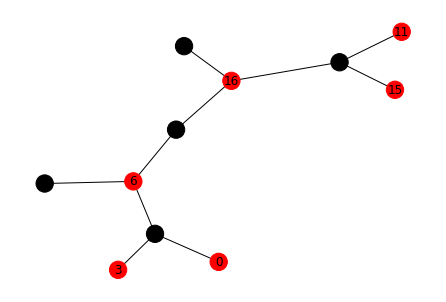

In [18]:
labels = nx.get_node_attributes(my_bst_graph, 'label') 
colors=list(nx.get_node_attributes(my_bst_graph, 'color').values())
nx.draw(my_bst_graph, labels=labels,node_color=colors)